In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [2]:
df= pd.read_csv('../input/netflix-original-films-imdb-scores/NetflixOriginals.csv', encoding='latin-1')

In [3]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [5]:
#aynı satırları siliyorum.
df.drop_duplicates(inplace= True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [7]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [8]:
missing_values_table(df)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [9]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [10]:
# 1. uzun soluklu filmler için runtime ortalamasını alıp ortalamadan uzun süre olanları çekiyorum.
df["Runtime"].mean()

93.57705479452055

In [11]:
filmUzunlukKategori = []
for i in df.Runtime:
    if i <= 80:
        filmUzunlukKategori.append('Cok Kisa')
    elif i > 80 and i <=120:
        filmUzunlukKategori.append('Normal')
    else:
        filmUzunlukKategori.append('Cok Uzun')

In [12]:
df['uzunlukKategori'] = filmUzunlukKategori
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,uzunlukKategori
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Cok Kisa
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Normal
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Cok Kisa
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Normal
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Normal


In [13]:
uzun_soluklu_filmler= df[df.uzunlukKategori == 'Cok Uzun']
uzun_soluklu_filmler

,Title,Genre,Premiere,Runtime,IMDB Score,Language,uzunlukKategori
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,Cok Uzun
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,Cok Uzun
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,Cok Uzun
16,Ghost Stories,Horror anthology,"January 1, 2020",144,4.3,Hindi,Cok Uzun
77,Sandy Wexler,Comedy,"April 14, 2017",131,5.2,English,Cok Uzun
...,...,...,...,...,...,...,...
561,The Irishman,Crime drama,"November 27, 2019",209,7.8,English,Cok Uzun
562,The Trial of the Chicago 7,Drama,"October 16, 2020",130,7.8,English,Cok Uzun
565,Marriage Story,Drama,"December 6, 2019",136,7.9,English,Cok Uzun
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Cok Uzun


In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
labels= uzun_soluklu_filmler["Language"]

In [16]:
labels.unique()

array(['Hindi', 'English', 'Japanese', 'Marathi', 'Spanish', 'Korean',
       'Indonesian', 'Khmer/English/French', 'Portuguese',
       'English/Korean', 'English/Akan'], dtype=object)

In [17]:
from collections import Counter

In [18]:
status_d = Counter(labels)

In [19]:
status_d

Counter({'Hindi': 8,
         'English': 46,
         'Japanese': 2,
         'Marathi': 2,
         'Spanish': 2,
         'Korean': 3,
         'Indonesian': 1,
         'Khmer/English/French': 1,
         'Portuguese': 1,
         'English/Korean': 1,
         'English/Akan': 1})

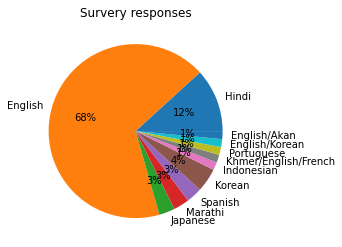

In [20]:
key_list = list(status_d.keys())
val_list = list(status_d.values())

fig, ax = plt.subplots()
ax.pie(val_list, labels = key_list, autopct='%.0f%%')
ax.set_title('Survery responses')
plt.show();

In [21]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,uzunlukKategori
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,Cok Kisa
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,Normal
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,Cok Kisa
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,Normal
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,Normal


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, "2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri")

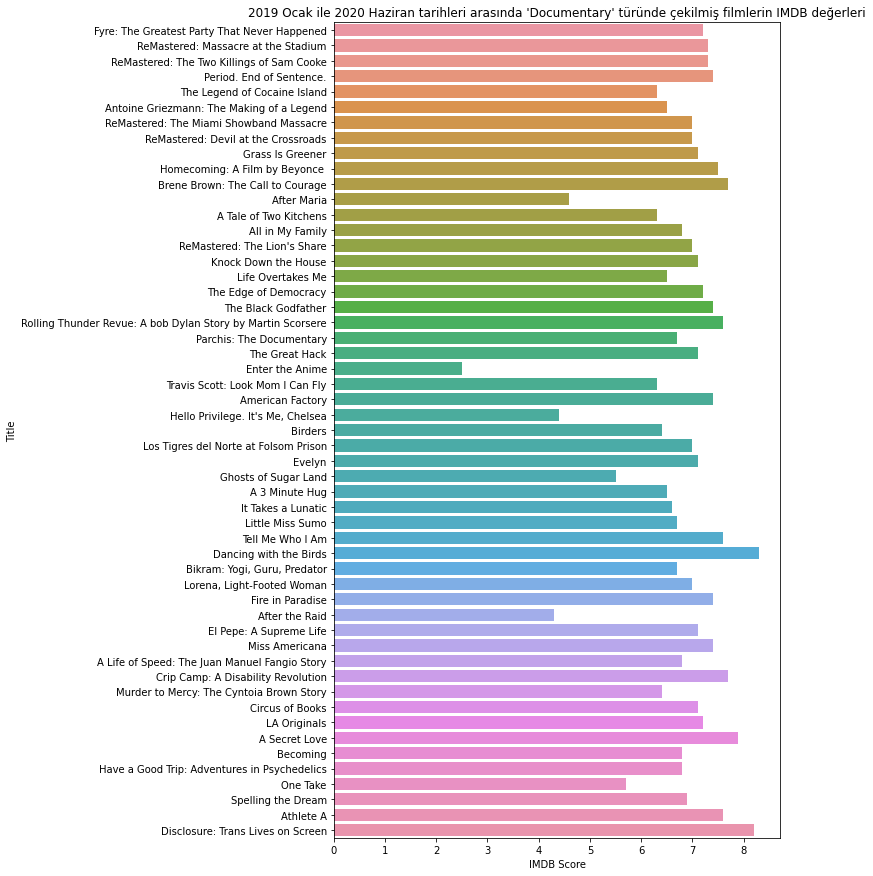

In [22]:
# 2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

df["Date"]= pd.to_datetime(df.Premiere)
df["Yıl"]= df["Date"].dt.year
df["Month"]= df["Date"].dt.month
film= df[df["Genre"]== "Documentary"].sort_values(["Yıl","Month"])
film1= film[film["Yıl"]==2019]
film2= film[(film["Yıl"]==2020) & (film["Month"]<=6)]

film_imdb= pd.concat([film1,film2], axis=0)
film_imdb

import seaborn as sns
plt.figure(figsize=(8,15))
sns.barplot(film_imdb["IMDB Score"], film_imdb["Title"])
plt.title("2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri")

In [23]:
# 3. İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?
ing_film=df[df["Language"]== "English"].groupby("Genre")
ing_film_sırala= ing_film.max().sort_values(by="IMDB Score",ascending=False)
ing_film_sırala

,Title,Premiere,Runtime,IMDB Score,Language,uzunlukKategori,Date,Yıl,Month
Genre,,,,,,,,,
Documentary,Zion,"September 9, 2020",144,9.0,English,Normal,2021-05-26,2021,12
One-man show,Springsteen on Broadway,"November 13, 2018",153,8.5,English,Normal,2018-12-16,2018,12
Concert Film,Taylor Swift: Reputation Stadium Tour,"October 12, 2016",125,8.4,English,Normal,2020-12-21,2020,12
Animation/Christmas/Comedy/Adventure,Klaus,"November 15, 2019",97,8.2,English,Normal,2019-11-15,2019,11
Drama,XOXO,"September 30, 2020",151,7.9,English,Normal,2021-05-27,2021,12
...,...,...,...,...,...,...,...,...,...
Anime / Short,Sol Levante,"April 2, 2020",4,4.7,English,Cok Kisa,2020-04-02,2020,4
Superhero-Comedy,Thunder Force,"April 9, 2021",105,4.4,English,Normal,2021-04-09,2021,4
Political thriller,The Last Thing He Wanted,"February 21, 2020",115,4.3,English,Normal,2020-02-21,2020,2


In [24]:
# 4. 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

h_o= df[df["Language"]== "Hindi"]
h_o.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


Runtime        115.787879
IMDB Score       5.981818
Yıl           2019.727273
Month            6.303030
dtype: float64

In [25]:
# 5. 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Film Türleri')

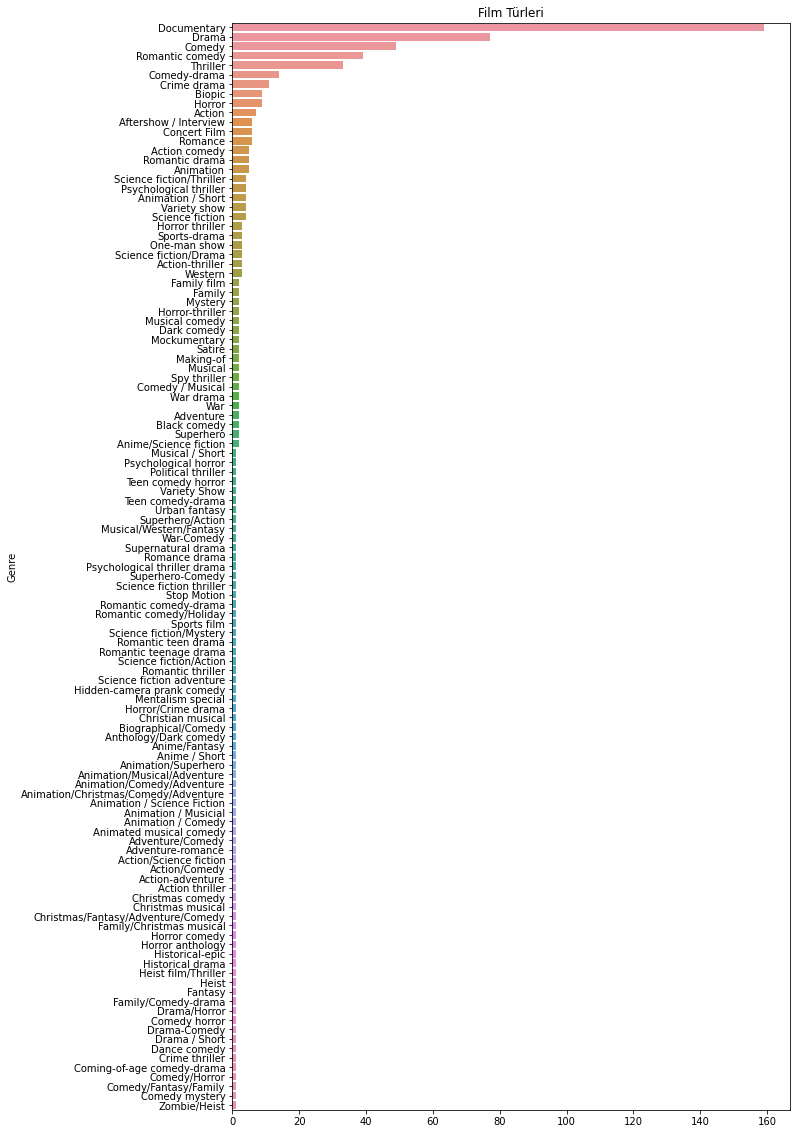

In [26]:
df_genre= df.value_counts("Genre")
df_genre
plt.figure(figsize=(10,20))
sns.barplot(df_genre, df_genre.index)
plt.title('Film Türleri')

In [27]:
#6. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.
df["Language"].value_counts().head()

English    401
Hindi       33
Spanish     31
French      20
Italian     14
Name: Language, dtype: int64

In [28]:
#7. IMDB puanı en yüksek olan ilk 10 film hangileridir?
df.sort_values("IMDB Score", ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,uzunlukKategori,Date,Yıl,Month
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,Normal,2020-10-04,2020,10
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,Normal,2020-12-08,2020,12
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,Cok Uzun,2018-12-16,2018,12
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,Normal,2015-10-09,2015,10
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,Cok Uzun,2018-12-31,2018,12
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,Normal,2020-05-20,2020,5
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,Cok Kisa,2019-10-23,2019,10
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,Normal,2017-11-24,2017,11
573,Klaus,Animation/Christmas/Comedy/Adventure,"November 15, 2019",97,8.2,English,Normal,2019-11-15,2019,11
571,13th,Documentary,"October 7, 2016",100,8.2,English,Normal,2016-10-07,2016,10


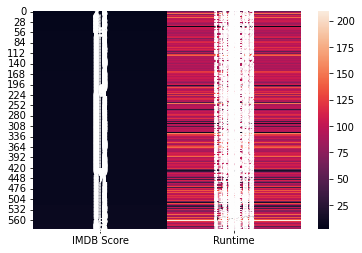

In [29]:
#8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.
df_korelasyon = df[["IMDB Score", "Runtime"]]
corr= df_korelasyon.corr()
ax = sns.heatmap(df_korelasyon, annot=True)

In [30]:
#11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
df.head()
yıl_count= df["Yıl"].value_counts()
yıl_count

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Yıl, dtype: int64

Text(0.5, 1.0, 'Yıllara Göre Film Sayıları')

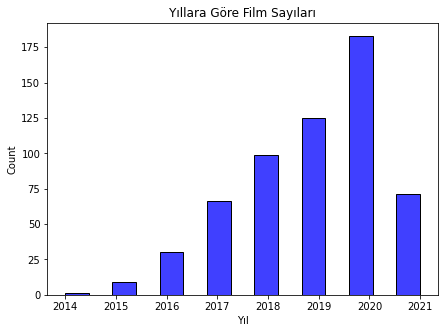

In [31]:
plt.figure(figsize=(7, 5))
sns.histplot(x='Yıl', data=df, bins=15, color='blue')
plt.title("Yıllara Göre Film Sayıları")

In [32]:
#12. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
ort_sure= df.groupby("Language")["IMDB Score"].mean()
ort_sure.sort_values()



Language
Malay                         4.200000
English/Japanese              4.400000
Norwegian                     5.100000
Filipino                      5.100000
Polish                        5.166667
Thai                          5.450000
Swedish                       5.500000
Italian                       5.542857
Spanish/Basque                5.600000
German                        5.640000
Turkish                       5.660000
French                        5.770000
Dutch                         5.800000
Indonesian                    5.844444
Korean                        5.916667
Hindi                         5.981818
Marathi                       6.066667
Portuguese                    6.216667
English/Spanish               6.220000
Spanish                       6.303226
English                       6.380050
Japanese                      6.400000
Spanish/Catalan               6.400000
English/Taiwanese/Mandarin    6.500000
English/Swedish               6.500000
Thia/English    

In [33]:
#13. Hangi yılın toplam "runtime" süresi en fazladır?
toplam_runtime= df.groupby("Yıl")["Runtime"].sum().sort_values(ascending=False)
toplam_runtime

Yıl
2020    17384
2019    10856
2018     9405
2021     7214
2017     6129
2016     2766
2015      814
2014       81
Name: Runtime, dtype: int64

In [34]:
#14. Her bir dilin en fazla kullanıldığı "Genre" nedir?
max_genre= df.groupby("Language")["Genre"].max()
max_genre

Language
Bengali                                        Documentary
Dutch                                      Romantic comedy
English                                       Zombie/Heist
English/Akan                                     War drama
English/Arabic                                 Documentary
English/Hindi                                  Documentary
English/Japanese                               Documentary
English/Korean                            Action-adventure
English/Mandarin                               Documentary
English/Russian                                Documentary
English/Spanish                                Documentary
English/Swedish                                Documentary
English/Taiwanese/Mandarin                           Drama
English/Ukranian/Russian                       Documentary
Filipino                                          Thriller
French                                            Thriller
Georgian                                       

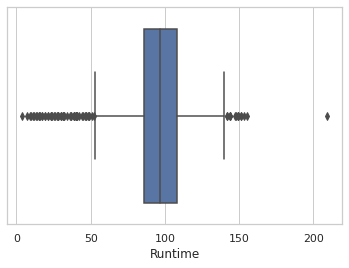

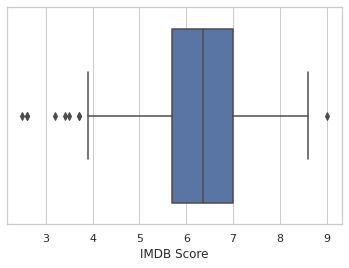

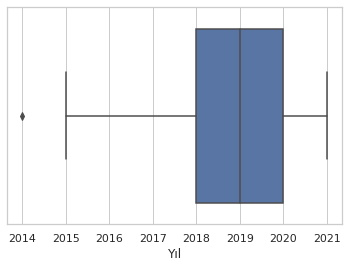

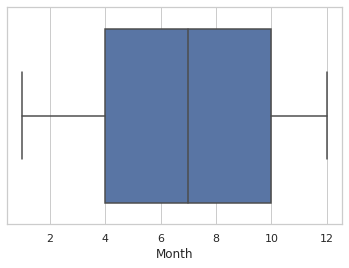

In [35]:
#15. Veri setinde outlier veri var mıdır? Açıklayınız.

def show_outliers(df):
    sns.set_theme(style="whitegrid")
    for col in df.columns:
        if df[col].dtypes in ["float","int","int64","float64"]:
            ax = sns.boxplot(x=df[col])
            plt.show()

show_outliers(df)

Runtime sütununda çok fazla olmasıyla birlikte IMDB skor ve Yıl sütununda da aykırı değerler mevcuttur. Ay da aykırı değer bulunmamaktadır.